In [58]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

In [59]:
url = "https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page="
headers = {"User-Agent":"/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}
companyname = []
rating = []
company_type = []
employees = []
yearsold = []
headquarter = []
office_loc = []
highrated = []
reviews = []
interviews = []
jobs = []
benefits = []
awards = []
for i in range(1,21):
    url=("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page="+str(i))
    
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text)
    
    data = soup.find_all("h2",class_="companyCardWrapper__companyName")
    data1 = soup.find_all("span",class_="companyCardWrapper__companyRatingValue")
    data2 = soup.find_all("span",class_="companyCardWrapper__interLinking")
    data3 = soup.find_all("div",class_="companyCardWrapper")
    data4= soup.find_all("div",class_="companyCardWrapper__tertiaryInformation")
    data5 = soup.find_all("div",class_="companyCardWrapper__companyDetails")
    
    for i in data:
        a = i.text
        b = re.findall("\w+",a)
        if len(b)>0:
            companyname.append(b[0])
        else:
            companyname.append(np.nan)
    
    for rating_element in data1:
        a = rating_element.text.strip()
        b = rating.append(a)
    
    for i in data4:
        a = i.text
        b = re.findall("(\d+\.\d+\w+\s)Reviews",a)
        if len(b)>0:
            reviews.append(b[0])
        else:
            reviews.append(np.nan)

    for i in data4:
        a = i.text
        b = re.findall("(\d+\.\d+k\s)Interviews",a)
        if len(b)>0:
            interviews.append(b[0])
        else:
            interviews.append(np.nan)

    for i in data4:
        a = i.text
        b = re.findall("(\d+\s)Jobs",a)
        if len(b)>0:
            jobs.append(b[0])
        else:
            jobs.append(np.nan)
    
    for i in data4:
        a = i.text
        b = re.findall("(\d+\.\d+k\s)Benefits",a)
        if len(b)>0:
            benefits.append(b[0])
        else:
            benefits.append(np.nan)
            
            
    for i in data5:
        a = i.text
        b = re.findall("\s\w+\s\w+\s\w+'\d+",a)
        if len(b)>0:
            awards.append(b[0])
        else:
            awards.append(np.nan)
            
    for i in data2:
        a = i.text
        b = re.findall("\s(\w+.*)\|.*Employees",a)
        if len(b)>0:
            company_type.append(b[0])
        else:
            company_type.append(np.nan)
            
    for i in data2:
        a = i.text
        b = re.findall("\s\w+.*\|(.*)Employees",a)
        if len(b)>0:
            employees.append(b[0])
        else:
            employees.append(np.nan)
    
    for i in data2:
        a = i.text
        b = re.findall(r"\s\w+.*\s(\d+)\s\w+\sold",a)
        if len(b)>0:
            yearsold.append(b[0])
        else:
            yearsold.append(np.nan)
            
    for i in data2:
        a = i.text
        b = re.findall(r"\s\w+.*\s\d+\s\w+\s\w+\s\|\s(\w+).*",a)
        if len(b)>0:
            headquarter.append(b[0])
        else:
            headquarter.append(np.nan)
            
    for i in data3:
        a = i.find('span',class_='companyCardWrapper__ratingValues')
        if a:
            highrated.append(a.text)
        else:
            highrated.append(np.nan)
    
    for i in data2:
        a = i.text
        b = re.findall(r"\s\w+.*\s\d+\s\w+\s\w+\s\|\s\w+\s\W(\d+)\s.*",a)
        if len(b)>0:
            office_loc.append(b[0])
        else:
            office_loc.append(np.nan)


In [60]:
dict1 = {"Company_Names":companyname,"Total_Employees": employees,"Age":yearsold,"Headquater":headquarter,"Office_Locations": office_loc,"High_Rated_For":highrated,"Total_Reviews":reviews,
        "Total_Interviews":interviews,"Total_Jobs":jobs,"Total_Benefits":benefits,"Total_Rating":rating,"AmbitionBox_Awards":awards,}

In [4]:
df3 = pd.DataFrame(dict1)

In [5]:
df3.duplicated(subset='Company_Names', keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397     True
398     True
399    False
Length: 400, dtype: bool

In [7]:
df3

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Interviews,Total_Jobs,Total_Benefits,Total_Rating,AmbitionBox_Awards
0,TCS,1 Lakh+,55,Mumbai,323,"Job Security, Work Life Balance",NaN,5.9k,573,11.4k,3.8,NaN
1,Accenture,1 Lakh+,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.4k,4.1k,NaN,NaN,4.0,AmbitionBox Award Winner'22
2,Cognizant,1 Lakh+,29,Teaneck,NaN,Skill Development / Learning,39.9k,3.5k,449,5.8k,3.9,AmbitionBox Award Winner'22
3,Wipro,1 Lakh+,78,Bangalore,NaN,Job Security,37.4k,3.4k,313,4.9k,3.8,AmbitionBox Award Winner'22
4,HDFC,1 Lakh+,29,Mumbai,1489,"Job Security, Skill Development / Learning",32.2k,1.5k,412,3.2k,3.9,AmbitionBox Award Winner'22
...,...,...,...,...,...,...,...,...,...,...,...,...
395,Sobha,1k-5k,28,Bangalore,NaN,"Job Security, Skill Development / Learning",1.5k,NaN,49,NaN,4.0,NaN
396,Foundever,5k-10k,38,Miami,15,"Job Security, Work Life Balance",1.5k,NaN,108,NaN,3.9,NaN
397,Bharat,5k-10k,71,Mumbai,204,"Skill Development / Learning, Salary & Benefit...",1.5k,NaN,NaN,NaN,4.1,NaN
398,ITC,5k-10k,48,Kolkata,70,"Job Security, Skill Development / Learning, Co...",1.5k,NaN,NaN,NaN,4.1,NaN


In [8]:
df3.isnull().sum()

Company_Names           0
Total_Employees         6
Age                    10
Headquater             10
Office_Locations      125
High_Rated_For          3
Total_Reviews          41
Total_Interviews      382
Total_Jobs             38
Total_Benefits        368
Total_Rating            0
AmbitionBox_Awards    343
dtype: int64

In [9]:
df2=df3.dropna()
df3.shape

(400, 12)

In [10]:
df3.to_csv(r"C:\Users\Lenovo\Desktop\final_AmbitionBox.csv")

In [104]:
df3 = pd.read_csv(r"C:\Users\Lenovo\Desktop\final_AmbitionBox.csv")
df3

,Unnamed: 0,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Interviews,Total_Jobs,Total_Benefits,Total_Rating,AmbitionBox_Awards
0,0,TCS,1 Lakh+,55.0,Mumbai,323.0,"Job Security, Work Life Balance",NaN,5.9k,573.0,11.4k,3.8,NaN
1,1,Accenture,1 Lakh+,34.0,Dublin,162.0,"Company Culture, Skill Development / Learning,...",44.4k,4.1k,NaN,NaN,4.0,AmbitionBox Award Winner'22
2,2,Cognizant,1 Lakh+,29.0,Teaneck,NaN,Skill Development / Learning,39.9k,3.5k,449.0,5.8k,3.9,AmbitionBox Award Winner'22
3,3,Wipro,1 Lakh+,78.0,Bangalore,NaN,Job Security,37.4k,3.4k,313.0,4.9k,3.8,AmbitionBox Award Winner'22
4,4,HDFC,1 Lakh+,29.0,Mumbai,1489.0,"Job Security, Skill Development / Learning",32.2k,1.5k,412.0,3.2k,3.9,AmbitionBox Award Winner'22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,Sobha,1k-5k,28.0,Bangalore,NaN,"Job Security, Skill Development / Learning",1.5k,NaN,49.0,NaN,4.0,NaN
396,396,Foundever,5k-10k,38.0,Miami,15.0,"Job Security, Work Life Balance",1.5k,NaN,108.0,NaN,3.9,NaN
397,397,Bharat,5k-10k,71.0,Mumbai,204.0,"Skill Development / Learning, Salary & Benefit...",1.5k,NaN,NaN,NaN,4.1,NaN
398,398,ITC,5k-10k,48.0,Kolkata,70.0,"Job Security, Skill Development / Learning, Co...",1.5k,NaN,NaN,NaN,4.1,NaN


## Data cleaning

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          400 non-null    int64  
 1   Company_Names       400 non-null    object 
 2   Total_Employees     394 non-null    object 
 3   Age                 390 non-null    float64
 4   Headquater          390 non-null    object 
 5   Office_Locations    275 non-null    float64
 6   High_Rated_For      397 non-null    object 
 7   Total_Reviews       359 non-null    object 
 8   Total_Interviews    18 non-null     object 
 9   Total_Jobs          362 non-null    float64
 10  Total_Benefits      32 non-null     object 
 11  Total_Rating        400 non-null    float64
 12  AmbitionBox_Awards  57 non-null     object 
dtypes: float64(4), int64(1), object(8)
memory usage: 40.8+ KB


In [105]:
# Total_Employees

df3["Total_Employees"].unique()

Total_Employees_replacce_values = {' 1 Lakh+ ':100000,
                                  ' 50k-1 Lakh ':75000,
                                  ' 10k-50k ':25000,' 5k-10k ':7500,' 1k-5k ':2500, ' 201-500 ':250,
                                  ' 11-50 ':20,' 501-1k ':47500,' 51-200 ':75}

df3["Total_Employees"].replace(Total_Employees_replacce_values,inplace=True)

Employess_mean = df3["Total_Employees"].mean()

null_values_employees = df3["Total_Employees"].isnull().sum()

df3["Total_Employees"]=df3["Total_Employees"].fillna(Employess_mean).astype(int)

In [106]:
df3.columns

Index(['Unnamed: 0', 'Company_Names', 'Total_Employees', 'Age', 'Headquater',
       'Office_Locations', 'High_Rated_For', 'Total_Reviews',
       'Total_Interviews', 'Total_Jobs', 'Total_Benefits', 'Total_Rating',
       'AmbitionBox_Awards'],
      dtype='object')

In [107]:
# Age

null_values_age = df3['Age'].isnull().sum()

df3['Age'] = df3['Age'].astype(float)

Age_mean = df3['Age'].mean()

df3['Age']= df3['Age'].fillna(Age_mean)

df3['Age'] = df3['Age'].astype(int)


In [108]:
# Headquater

null_values_location = df3['Headquater'].isnull().sum()

df3['Headquater'].fillna(method='ffill',inplace = True)

In [109]:
# other Office Location

null_values_location = df3['Office_Locations'].isnull().sum()

reviews_mean = df3['Office_Locations'].mean()

df3["Office_Locations"]=df3["Office_Locations"].fillna(reviews_mean).astype(int) # filling null values

In [110]:
# High_Rated_For

null_values_highrated = df3['High_Rated_For'].isnull().sum()

df3['High_Rated_For'].fillna('Not Rated For',inplace = True)

In [112]:
# Total_Reviews

null_values_Reviews = df3['Total_Reviews'].isnull().sum()

df3['Total_Reviews'].unique()

df3['Total_Reviews'] = df3['Total_Reviews'].str.replace('k','').astype(float)

reviews_mean = df3['Total_Reviews'].mean()

df3["Total_Reviews"]=df3["Total_Reviews"].fillna(reviews_mean)# filling null values


In [113]:
df3["Total_Reviews"]

0       4.037326
1      44.400000
2      39.900000
3      37.400000
4      32.200000
         ...    
395     1.500000
396     1.500000
397     1.500000
398     1.500000
399     1.500000
Name: Total_Reviews, Length: 400, dtype: float64

In [114]:
# Total_Interviews

null_values_Interviews = df3['Total_Interviews'].isnull().sum()

df3.drop("Total_Interviews",axis=1,inplace = True) # droped null values are morethan 40% Interviews

In [115]:
# Total_Jobs

null_values_Jobs = df3['Total_Jobs'].isnull().sum()

job_mean = df3['Total_Jobs'].mean()

df3['Total_Jobs'] = df3['Total_Jobs'].fillna(job_mean).astype(int)

In [116]:
# Total_Benefits

null_values_benefits = df3['Total_Benefits'].isnull().sum()

df3.drop("Total_Benefits",axis=1,inplace = True) # droped null values are morethan 40% Benefits

In [117]:
# Total_Rating

null_values_rating = df3['Total_Rating'].isnull().sum()

df3['Total_Rating'].astype(float)

0      3.8
1      4.0
2      3.9
3      3.8
4      3.9
      ... 
395    4.0
396    3.9
397    4.1
398    4.1
399    4.0
Name: Total_Rating, Length: 400, dtype: float64

In [118]:
# AmbitionBox_Awards

null_values_awards = df3['AmbitionBox_Awards'].isnull().sum()

df3['AmbitionBox_Awards'].fillna('Not Received',inplace = True)

In [126]:
# droped the unnamed column

# df3.drop('Unnamed: 0',axis=1,inplace = True)
df3

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
0,TCS,100000,55,Mumbai,323,"Job Security, Work Life Balance",4.037326,573,3.8,Not Received
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.400000,102,4.0,AmbitionBox Award Winner'22
2,Cognizant,100000,29,Teaneck,199,Skill Development / Learning,39.900000,449,3.9,AmbitionBox Award Winner'22
3,Wipro,100000,78,Bangalore,199,Job Security,37.400000,313,3.8,AmbitionBox Award Winner'22
4,HDFC,100000,29,Mumbai,1489,"Job Security, Skill Development / Learning",32.200000,412,3.9,AmbitionBox Award Winner'22
...,...,...,...,...,...,...,...,...,...,...
395,Sobha,2500,28,Bangalore,199,"Job Security, Skill Development / Learning",1.500000,49,4.0,Not Received
396,Foundever,7500,38,Miami,15,"Job Security, Work Life Balance",1.500000,108,3.9,Not Received
397,Bharat,7500,71,Mumbai,204,"Skill Development / Learning, Salary & Benefit...",1.500000,102,4.1,Not Received
398,ITC,7500,48,Kolkata,70,"Job Security, Skill Development / Learning, Co...",1.500000,102,4.1,Not Received


In [4]:
df = pd.read_csv("Final_AmbitionBox_Project1.csv")

In [5]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [32]:
df

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
0,TCS,100000,55,Mumbai,323,"Job Security, Work Life Balance",4.037326,573,3.8,Not Received
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.400000,102,4.0,AmbitionBox Award Winner'22
2,Cognizant,100000,29,Teaneck,199,Skill Development / Learning,39.900000,449,3.9,AmbitionBox Award Winner'22
3,Wipro,100000,78,Bangalore,199,Job Security,37.400000,313,3.8,AmbitionBox Award Winner'22
4,HDFC,100000,29,Mumbai,1489,"Job Security, Skill Development / Learning",32.200000,412,3.9,AmbitionBox Award Winner'22
...,...,...,...,...,...,...,...,...,...,...
395,Sobha,2500,28,Bangalore,199,"Job Security, Skill Development / Learning",1.500000,49,4.0,Not Received
396,Foundever,7500,38,Miami,15,"Job Security, Work Life Balance",1.500000,108,3.9,Not Received
397,Bharat,7500,71,Mumbai,204,"Skill Development / Learning, Salary & Benefit...",1.500000,102,4.1,Not Received
398,ITC,7500,48,Kolkata,70,"Job Security, Skill Development / Learning, Co...",1.500000,102,4.1,Not Received


## Visulization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Total_Employees

df['Total_Employees'].describe()

count       400.000000
mean      23942.817500
std       26771.443593
min          75.000000
25%        7500.000000
50%       25000.000000
75%       25000.000000
max      100000.000000
Name: Total_Employees, dtype: float64

In [54]:
# df[df['Total_Employees']==100000] # Max Employee with Company Name

# df[df['Total_Employees']==20] # Min Employee with Company name

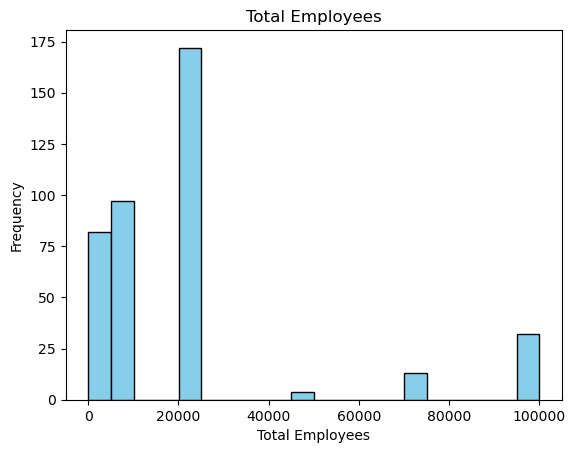

In [9]:
# Histogram
plt.hist(df['Total_Employees'],bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Employees')
plt.ylabel('Frequency')
plt.title('Total Employees')
plt.show()

**Insights:**
- The distribution of companies based on their total number of employees.
- It's indicating common employee size ranges(**20 to 1lakh** )among the companies

In [134]:
# Age

df['Age'].describe()

count    400.000000
mean      46.215000
std       41.331095
min        2.000000
25%       21.000000
50%       33.000000
75%       55.250000
max      333.000000
Name: Age, dtype: float64

In [135]:
df[df['Age']==333]

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
201,Barclays,25000,333,London,30,"Job Security, Company Culture, Work Life Balance",2.4,43,4.1,Not Received


In [136]:
df[df['Age']==2]

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
335,Kyndryl,25000,2,New,199,"Work Life Balance, Skill Development / Learnin...",1.7,39,4.1,Not Received


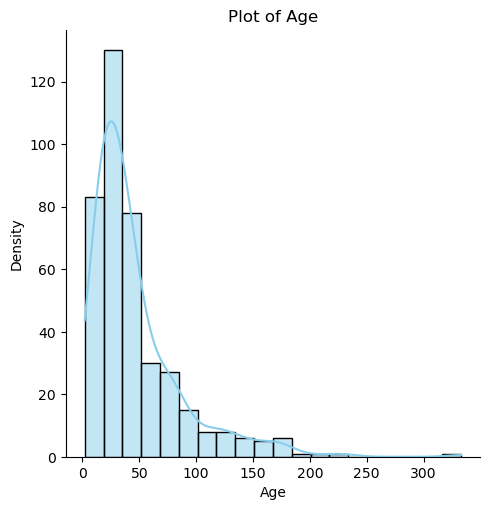

In [10]:
# Distribution Plot
sns.displot(df['Age'], kde=True, color='skyblue', bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Plot of Age')
plt.show()

**Insights**
1. The distribution plot showcases the spread of ages among companies, emphasizing the frequency of different age groups in the dataset.
2. Minimum 2 years old - Kyndryl and 333 years old - Barclays Comapnies

In [138]:
df['Headquater'].describe()

count        400
unique        97
top       Mumbai
freq         103
Name: Headquater, dtype: object

In [139]:
df.groupby('Headquater')['Company_Names'].value_counts()['Dublin']

Company_Names
Accenture    1
Name: Company_Names, dtype: int64

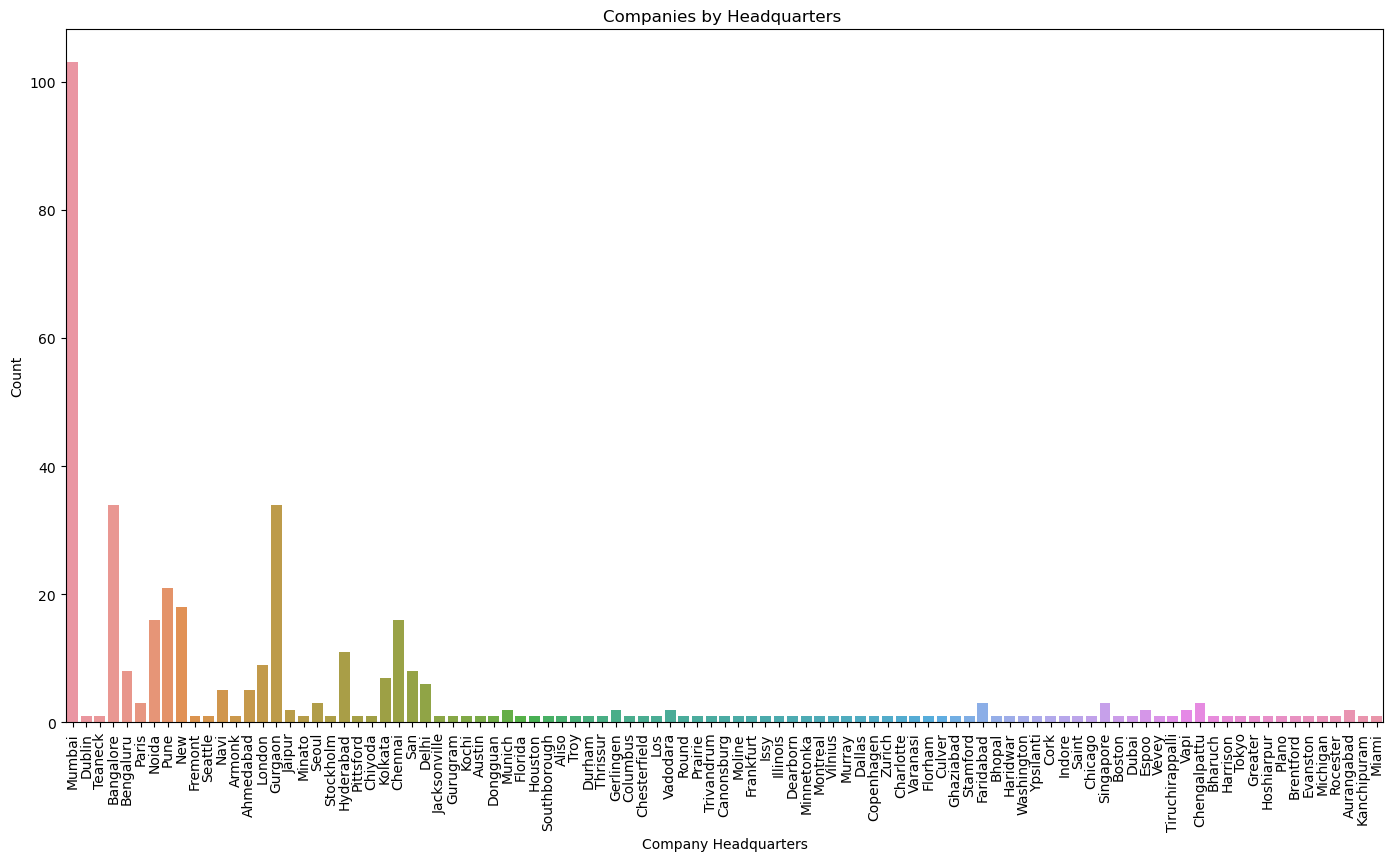

In [11]:
# count plot
plt.figure(figsize=(17,9))
sns.countplot(x='Headquater',data=df)
plt.xticks(rotation=90)
plt.xlabel('Company Headquarters')
plt.ylabel('Count')
plt.title("Companies by Headquarters ")
plt.show()


**Insights**
1. represents the number of companies based on their headquarters, giving a quick overview of the distribution of businesses across different locations.
2. Taller bars indicate higher counts 102 companies have headquarters as Mumbai

In [141]:
# 'Office_Locations'

df['Office_Locations'].describe()

count     400.000000
mean      199.067500
std       168.584652
min         8.000000
25%       104.000000
50%       199.000000
75%       199.000000
max      1489.000000
Name: Office_Locations, dtype: float64

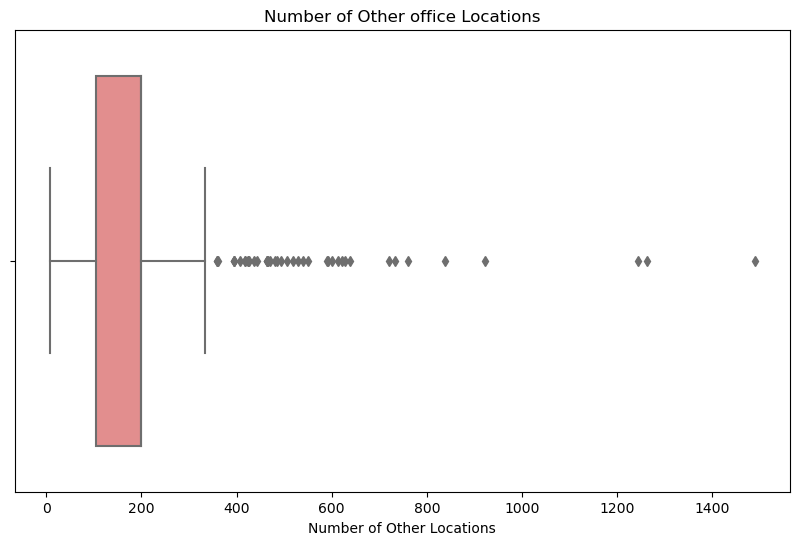

In [12]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Office_Locations'], color='lightcoral')
plt.xlabel('Number of Other Locations')
plt.title('Number of Other office Locations')
plt.show()

**Insights**

1. represents the distribution of companies based on the number of additional office locations, providing insights into the spread and variability in their office networks.

2. Most of the companies has almost 20 to 220 office locations

In [143]:
# 'High_Rated_For'

df['High_Rated_For'].describe()

count              400
unique              98
top       Job Security
freq                36
Name: High_Rated_For, dtype: object

In [13]:
df[df['High_Rated_For'] == "Work Life Balance, Company Culture, Skill Development / Learning"]

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
185,Bharat,7500,69,Bangalore,199,"Work Life Balance, Company Culture, Skill Deve...",2.5,102,4.1,Not Received
324,The,7500,93,San,199,"Work Life Balance, Company Culture, Skill Deve...",1.8,21,4.1,Not Received
342,Tata,250,27,Mumbai,147,"Work Life Balance, Company Culture, Skill Deve...",1.7,1,4.1,Not Received


In [146]:
df['High_Rated_For'].unique()

array(['Job Security, Work Life Balance',
       'Company Culture, Skill Development / Learning, Job Security',
       'Skill Development / Learning', 'Job Security',
       'Job Security, Skill Development / Learning',
       'Job Security, Skill Development / Learning, Company Culture',
       'Job Security, Company Culture, Skill Development / Learning',
       'Job Security, Work Life Balance, Skill Development / Learning',
       'Promotions / Appraisal, Salary & Benefits',
       'Job Security, Skill Development / Learning, Work Life Balance',
       'Job Security, Company Culture',
       'Company Culture, Salary & Benefits, Work Life Balance',
       'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
       'Work Life Balance, Job Security, Skill Development / Learning',
       'Skill Development / Learning, Job Security',
       'Skill Development / Learning, Job Security, Company Culture',
       'Company Culture, Work Life Balance, Skill Development / Learning',

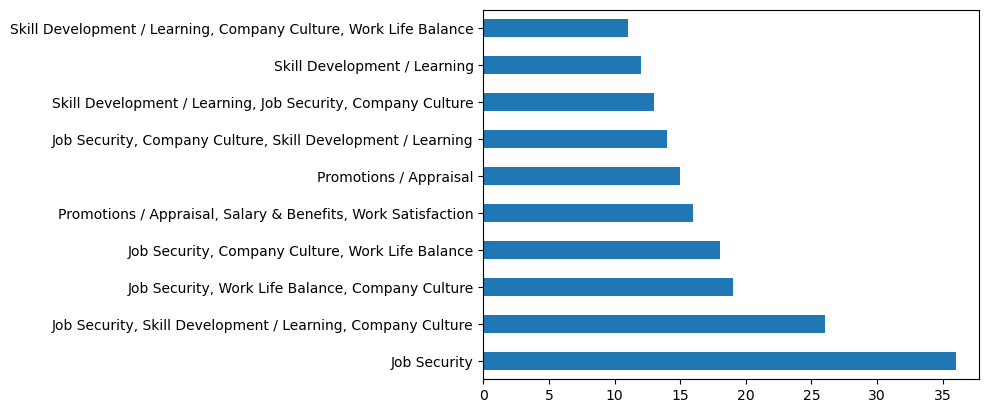

In [14]:
# distribution of based on companies high rated for and Not rated for

df['High_Rated_For'].value_counts().head(10).plot(kind='barh')

plt.show()

**Insights**

1. The horizontal bar chart depicts the distribution of companies based on what they are highly rated for, showcasing the top 10 areas where companies excel.
2. Bharat,The,Tata Companies are highrated For  Work Life Balance, Company Culture, Skill Development / Learning.Etc.

In [148]:
df['Total_Reviews'].describe()

count    400.000000
mean       4.037326
std        5.031734
min        1.500000
25%        1.900000
50%        2.600000
75%        4.037326
max       44.400000
Name: Total_Reviews, dtype: float64

In [58]:
df_sorted = df.sort_values(by="Total_Reviews", ascending=False)
df_sorted

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.4,102,4.0,AmbitionBox Award Winner'22
2,Cognizant,100000,29,Teaneck,199,Skill Development / Learning,39.9,449,3.9,AmbitionBox Award Winner'22
3,Wipro,100000,78,Bangalore,199,Job Security,37.4,313,3.8,AmbitionBox Award Winner'22
4,HDFC,100000,29,Mumbai,1489,"Job Security, Skill Development / Learning",32.2,412,3.9,AmbitionBox Award Winner'22
6,Infosys,100000,42,Bengaluru,199,"Job Security, Company Culture, Skill Developme...",30.3,869,3.9,AmbitionBox Award Winner'22
...,...,...,...,...,...,...,...,...,...,...
385,Shahi,100000,49,Faridabad,57,"Job Security, Skill Development / Learning, Co...",1.5,60,4.1,Not Received
383,3i,2500,30,Mumbai,101,"Promotions / Appraisal, Salary & Benefits, Ski...",1.5,41,3.5,Not Received
382,Force,2500,65,Pune,84,"Promotions / Appraisal, Company Culture, Salar...",1.5,3,3.5,Not Received
381,JCB,2500,78,Rocester,82,Work Life Balance,1.5,102,3.9,Not Received


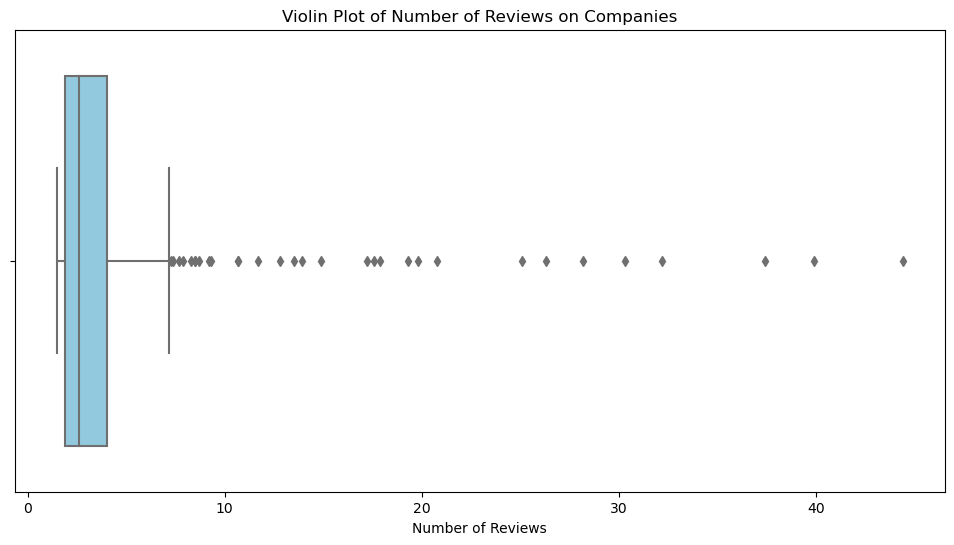

In [15]:
# violinplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total_Reviews'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.title('Violin Plot of Number of Reviews on Companies')
plt.show()

**Insights**
1. The violin plot visually represents the distribution of the number of reviews for companies, showcasing the density of review counts and their variations.

2. Foundever,Croma,TVS,Exide,RSPL are Companies 1k reviews and TCS has 68k Reviews in AmbitionBox

In [60]:
df['Total_Jobs'].describe()

count    400.000000
mean     102.000000
std      148.363183
min        1.000000
25%       16.000000
50%       52.000000
75%      102.250000
max      906.000000
Name: Total_Jobs, dtype: float64

In [16]:
sort_Jobs = df.sort_values(by="Total_Jobs", ascending=False)
sort_Jobs

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
21,BYJU,25000,12,Bangalore,298,"Job Security, Work Life Balance, Company Culture",4.037326,906,3.1,Not Received
7,Capgemini,100000,56,Paris,115,"Job Security, Work Life Balance, Skill Develop...",28.200000,905,3.8,AmbitionBox Award Winner'22
112,Indiamart,2500,27,Noida,131,"Promotions / Appraisal, Work Satisfaction",3.600000,904,3.6,Not Received
6,Infosys,100000,42,Bengaluru,199,"Job Security, Company Culture, Skill Developme...",30.300000,869,3.9,AmbitionBox Award Winner'22
365,Info,7500,28,Noida,54,"Job Security, Company Culture, Work Life Balance",1.600000,753,4.1,Not Received
...,...,...,...,...,...,...,...,...,...,...
293,Blue,25000,40,Mumbai,229,"Job Security, Company Culture, Work Life Balance",1.900000,1,4.1,Not Received
330,JMC,2500,41,Mumbai,114,"Job Security, Skill Development / Learning, Sa...",1.700000,1,4.2,Not Received
340,Sonalika,2500,54,Hoshiarpur,142,Job Security,1.700000,1,3.7,Not Received
342,Tata,250,27,Mumbai,147,"Work Life Balance, Company Culture, Skill Deve...",1.700000,1,4.1,Not Received


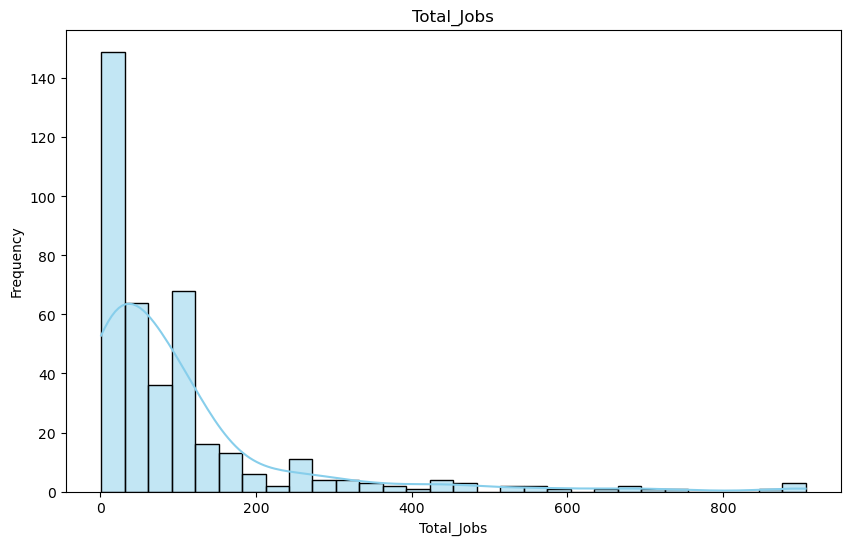

In [64]:
# Total Jobs
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Jobs'], bins=30, color='skyblue', kde=True)
plt.xlabel('Total_Jobs')
plt.ylabel('Frequency')
plt.title("Total_Jobs")
plt.show()

**Insights**
1. The plot of 'Total_Jobs' illustrates a right-skewed distribution, indicating that a majority of observations cluster towards lower values, with a long tail extending towards higher values.
2. Most of companies jobs openings falls range under 1 to 200 between

In [63]:
# 'Total_Rating'

df['Total_Rating'].describe()

count    400.00000
mean       3.95425
std        0.26610
min        3.10000
25%        3.80000
50%        4.00000
75%        4.10000
max        4.80000
Name: Total_Rating, dtype: float64

In [64]:
sort_Rating = df.sort_values("Total_Rating",ascending=True)

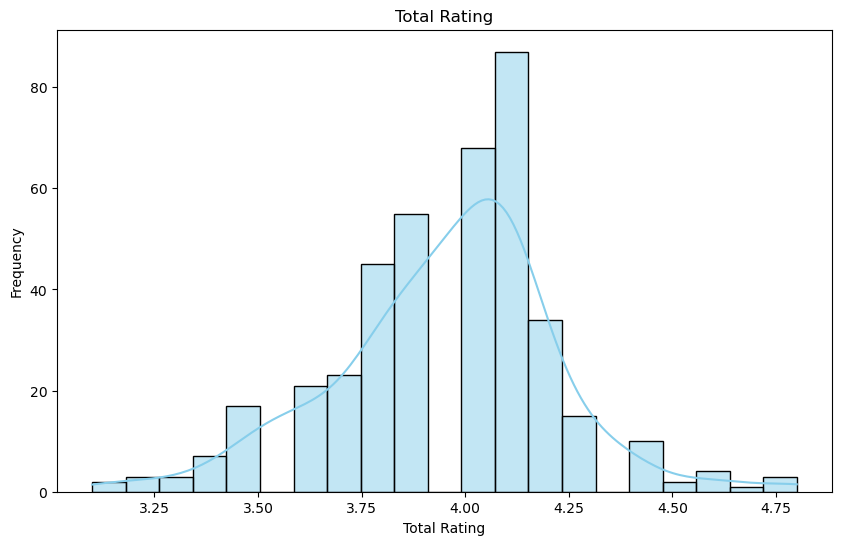

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Rating'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Total Rating')
plt.ylabel('Frequency')
plt.title('Total Rating')
plt.show()

**Insights**
1. The distribution plot visually represents the frequency of total ratings given to companies, offering insights into the prevalence of specific rating values in the dataset.
2. plot highlight common rating ranges are between 3.75 to 4.25

In [66]:
# 'AmbitionBox_Awards'

df['AmbitionBox_Awards'].describe()

count              400
unique               2
top       Not Received
freq               343
Name: AmbitionBox_Awards, dtype: object

In [21]:
df[df['AmbitionBox_Awards']== " AmbitionBox Award Winner'22"].head(5)

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.400000,102,4.0,AmbitionBox Award Winner'22
2,Cognizant,100000,29,Teaneck,199,Skill Development / Learning,39.900000,449,3.9,AmbitionBox Award Winner'22
3,Wipro,100000,78,Bangalore,199,Job Security,37.400000,313,3.8,AmbitionBox Award Winner'22
4,HDFC,100000,29,Mumbai,1489,"Job Security, Skill Development / Learning",32.200000,412,3.9,AmbitionBox Award Winner'22
5,ICICI,100000,29,Mumbai,1243,"Job Security, Skill Development / Learning, Co...",4.037326,212,4.0,AmbitionBox Award Winner'22


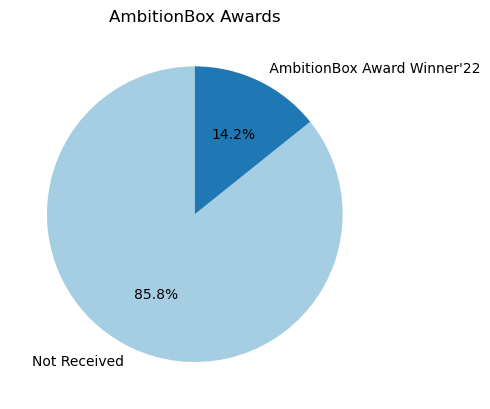

In [22]:
# pie chart
awards_counts = df['AmbitionBox_Awards'].value_counts()
plt.pie(awards_counts, labels=awards_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('AmbitionBox Awards')
plt.show()

**Insights**
1. The pie chart visually represents the distribution of AmbitionBox Awards among companies, depicting the percentage breakdown of companies with different types of awards.
2. Accenture,Cognizant,Wipro,ICICI,HDFC are the Top 5 Companies are AmbitionBox Award Winner'22


## Bi-variate Analysis

In [33]:
# Company_Name with Total_Employees
df_employees = Numeric_DataFrame.sort_values(by='Total_Employees', ascending=False)


In [34]:
df[df['Total_Employees']==20]

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards


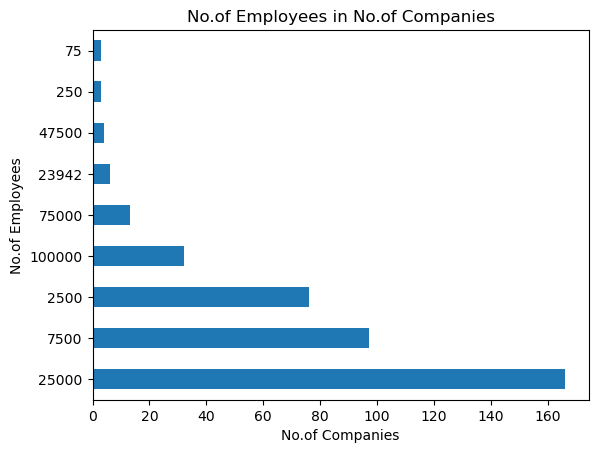

In [35]:
df['Total_Employees'].value_counts().plot(kind='barh')
plt.title("No.of Employees in No.of Companies")
plt.xlabel("No.of Companies")
plt.ylabel("No.of Employees")
plt.show()

**Insights**
1. The horizontal bar chart displays the distribution of companies based on the number of employees, offering a quick overview of the prevalent employee counts across the dataset.
2. Most of the company Empoyees range falls under 25000, Marpu company has 20 Employees only

In [36]:
df[df['Total_Employees']==250] # here we can find no.of companies Name who has No.of employees(250,75,47500)

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
119,Reliance,250,21,Navi,199,Skill Development / Learning,3.4,2,3.9,Not Received
305,UNO,250,65,Pune,83,"Job Security, Skill Development / Learning, Co...",1.9,5,4.0,Not Received
342,Tata,250,27,Mumbai,147,"Work Life Balance, Company Culture, Skill Deve...",1.7,1,4.1,Not Received


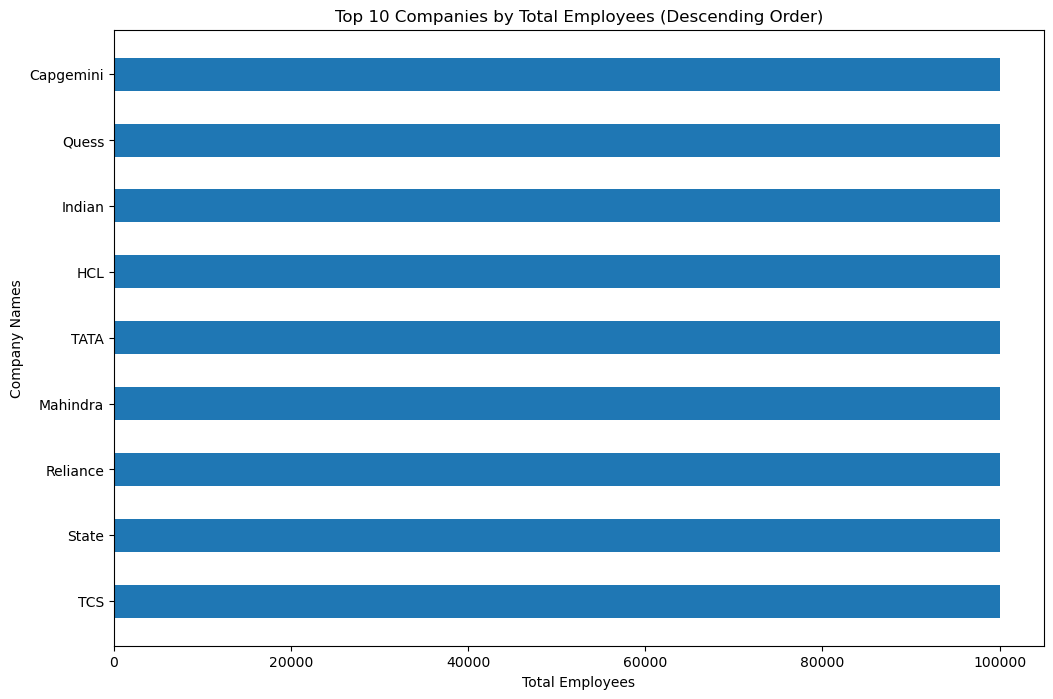

In [73]:
df_sorted = df.sort_values(by='Total_Employees', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(y=df_sorted['Company_Names'], width=df_sorted['Total_Employees'], height=0.5)
plt.xlabel('Total Employees')
plt.ylabel('Company Names')
plt.title('Top 10 Companies by Total Employees (Descending Order)')
plt.show()

**Insights**
1. The horizontal bar chart highlights the top 10 companies with the highest number of employees **1lakh**, showcasing their respective employee counts in descending order.

In [74]:
df.columns

Index(['Company_Names', 'Total_Employees', 'Age', 'Headquater',
       'Office_Locations', 'High_Rated_For', 'Total_Reviews', 'Total_Jobs',
       'Total_Rating', 'AmbitionBox_Awards'],
      dtype='object')

In [75]:
# 'Company_Names' & 'Age'(years of old)

group=df.groupby("Company_Names")['Age'].value_counts()
group.reset_index

<bound method Series.reset_index of Company_Names  Age
24             23     1
3i             30     1
ABB            35     1
ACC            87     1
ACT            15     1
                     ..
Zensar         22     1
Zomato         15     1
Zydus          71     1
eClerx         23     1
iEnergizer     23     1
Name: Age, Length: 390, dtype: int64>

In [76]:
sort_age = df.sort_values("Age",ascending = False)
sort_age

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
201,Barclays,25000,333,London,30,"Job Security, Company Culture, Work Life Balance",2.400000,43,4.1,Not Received
288,State,25000,231,Boston,16,Job Security,4.037326,86,3.8,Not Received
139,State,100000,217,Mumbai,466,Job Security,3.200000,182,3.7,Not Received
375,GlaxoSmithKline,2500,193,Brentford,173,"Company Culture, Skill Development / Learning,...",1.600000,324,4.2,Not Received
22,Deloitte,100000,178,London,152,"Job Security, Salary & Benefits, Skill Develop...",13.900000,289,3.9,AmbitionBox Award Winner'22
...,...,...,...,...,...,...,...,...,...,...
36,IDFC,25000,5,Mumbai,551,"Salary & Benefits, Skill Development / Learnin...",7.700000,82,4.0,Not Received
20,Vodafone,23942,5,Mumbai,621,"Company Culture, Work Life Balance, Skill Deve...",14.900000,339,4.2,Not Received
165,Whitehat,7500,5,Mumbai,49,"Job Security, Promotions / Appraisal, Work Lif...",2.700000,514,3.5,Not Received
152,Piramal,2500,3,Mumbai,311,"Company Culture, Skill Development / Learning,...",2.900000,23,4.2,Not Received


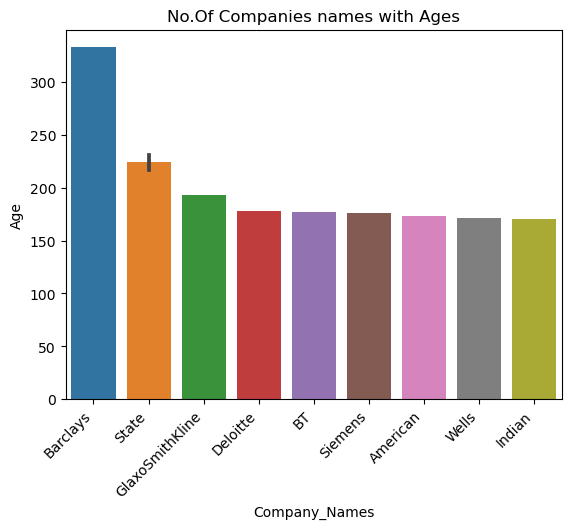

In [37]:
top=df.nlargest(10,'Age') # Top oldest companies
sns.barplot(x=top['Company_Names'],y=top['Age'])
plt.title("No.Of Companies names with Ages")
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights**
1. The bar chart highlights the top 10 oldest companies, displaying their respective ages based on the founding or establishment year.
2. Barlays is 333 years old, GlaxoSmithKline is 193 years old

In [78]:
df['Company_Names']

0            TCS
1      Accenture
2      Cognizant
3          Wipro
4           HDFC
         ...    
395        Sobha
396    Foundever
397       Bharat
398          ITC
399       Brakes
Name: Company_Names, Length: 400, dtype: object

In [79]:
df_employees['High_Rated_For'].unique()

array(['Job Security, Work Life Balance', 'Job Security',
       'Job Security, Skill Development / Learning, Work Life Balance',
       'Job Security, Skill Development / Learning, Company Culture',
       'Job Security, Company Culture, Work Satisfaction',
       'Work Life Balance',
       'Job Security, Work Life Balance, Company Culture',
       'Job Security, Skill Development / Learning, Salary & Benefits',
       'Skill Development / Learning, Job Security, Company Culture',
       'Company Culture, Skill Development / Learning, Job Security',
       'Job Security, Company Culture, Skill Development / Learning',
       'Work Life Balance, Company Culture, Salary & Benefits',
       'Job Security, Salary & Benefits, Skill Development / Learning',
       'Promotions / Appraisal, Salary & Benefits',
       'Job Security, Skill Development / Learning',
       'Work Life Balance, Job Security, Skill Development / Learning',
       'Company Culture, Salary & Benefits, Work Life Balan

In [80]:
# 'Company_Names' & 'High_Rated_For'

Highrated = df_employees[(df_employees['High_Rated_For']=='Salary & Benefits, Work Life Balance')|(df_employees['High_Rated_For']=='Company Culture, Work Satisfaction, Skill Development / Learning')|(df_employees['High_Rated_For']=='Company Culture, Work Satisfaction, Skill Development / Learning')|(df_employees['High_Rated_For']=='Company Culture, Salary & Benefits, Work Life Balance')|(df_employees['High_Rated_For']=='Skill Development / Learning, Job Security, Work Life Balance')]

In [81]:
Highrated

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
13,Amazon,100000,29,Seattle,423,"Company Culture, Salary & Benefits, Work Life ...",4.037326,681,4.1,AmbitionBox Award Winner'22
190,Alembic,25000,116,Vadodara,199,"Salary & Benefits, Work Life Balance",2.500000,47,4.0,Not Received
76,Amazon,25000,46,London,199,"Company Culture, Salary & Benefits, Work Life ...",4.700000,29,4.2,Not Received
49,Yes,25000,19,Mumbai,427,"Salary & Benefits, Work Life Balance",4.037326,18,3.9,Not Received
236,GATI,2500,11,Hyderabad,199,"Skill Development / Learning, Job Security, Wo...",2.200000,25,4.0,Not Received
238,Marpu,75,7,Hyderabad,199,"Company Culture, Work Satisfaction, Skill Deve...",2.200000,102,4.8,Not Received


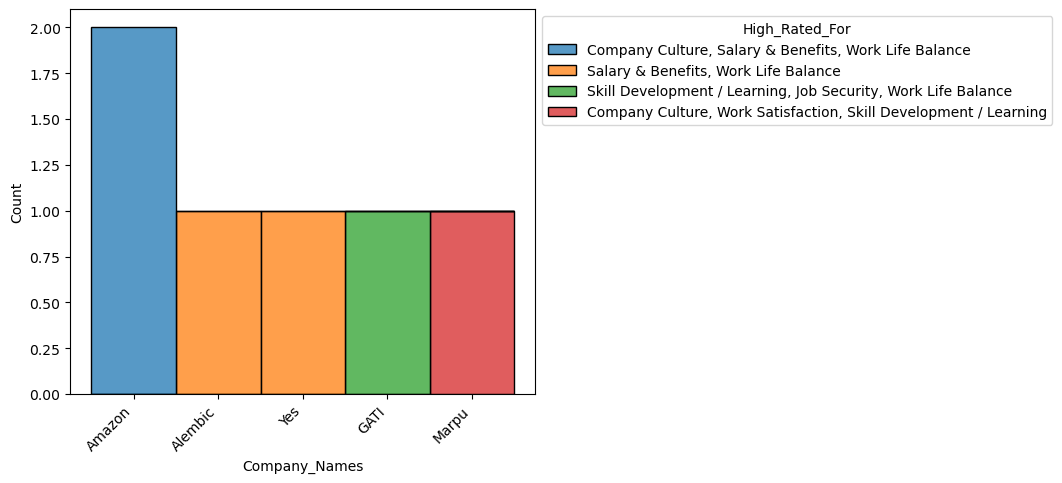

In [82]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(binwidth=0.5, x="Company_Names", hue="High_Rated_For", data=Highrated, stat="count", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights**
1. The histogram visualizes the count of companies based on their high-rated aspects, stacked for each company name, providing insights into the distribution of high ratings across different categories.
2. Amazon is Highrated For Company Culture, Salary & Benefits, Work Life Balance 

In [30]:
# Company_Names & Rating

df["Total_Rating"].unique()

array([3.8, 4. , 3.9, 3.7, 4.1, 3.6, 4.2, 3.1, 4.6, 3.5, 4.5, 3.2, 4.3,
       3.4, 4.7, 4.4, 4.8, 3.3])

In [38]:
ratings = df_employees[(df_employees['Total_Rating']>=4)|(df_employees['Total_Rating']<3)]

In [39]:
df_Rating = df.sort_values(by='Total_Rating', ascending=False)

In [40]:
filtered_df = df[df['Total_Rating']>=4]

In [41]:
filtered_df

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.400000,102,4.0,AmbitionBox Award Winner'22
5,ICICI,100000,29,Mumbai,1243,"Job Security, Skill Development / Learning, Co...",4.037326,212,4.0,AmbitionBox Award Winner'22
13,Amazon,100000,29,Seattle,423,"Company Culture, Salary & Benefits, Work Life ...",4.037326,681,4.1,AmbitionBox Award Winner'22
16,IBM,100000,112,Armonk,142,"Work Life Balance, Job Security, Skill Develop...",4.037326,102,4.1,AmbitionBox Award Winner'22
17,Larsen,25000,85,Mumbai,614,"Job Security, Skill Development / Learning",17.900000,108,4.0,Not Received
...,...,...,...,...,...,...,...,...,...,...
393,Delphi,2500,34,Kanchipuram,30,"Skill Development / Learning, Work Satisfactio...",1.500000,1,4.0,Not Received
395,Sobha,2500,28,Bangalore,199,"Job Security, Skill Development / Learning",1.500000,49,4.0,Not Received
397,Bharat,7500,71,Mumbai,204,"Skill Development / Learning, Salary & Benefit...",1.500000,102,4.1,Not Received
398,ITC,7500,48,Kolkata,70,"Job Security, Skill Development / Learning, Co...",1.500000,102,4.1,Not Received


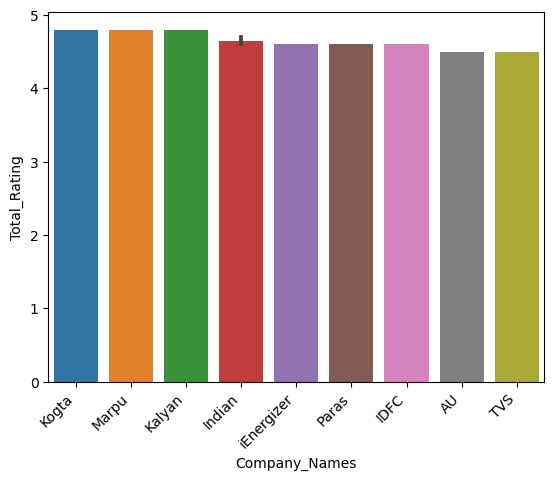

In [88]:
top4=df.nlargest(10,'Total_Rating') # Top Rated companies
sns.barplot(x=top4['Company_Names'],y=top4['Total_Rating'])
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight**
1. The bar chart showcases the top 10 highest-rated companies, illustrating their overall ratings in descending order.
2. Accenture,ICICI,Amazon,IBM,Larsen,HDB,Vodafone,Deloitte,Reliance,Bharti comapnies rating is morethan or equal to 

## Mulivariate Analaysis

In [96]:
df.columns

Index(['Company_Names', 'Total_Employees', 'Age', 'Headquater',
       'Office_Locations', 'High_Rated_For', 'Total_Reviews', 'Total_Jobs',
       'Total_Rating', 'AmbitionBox_Awards'],
      dtype='object')

In [42]:
filtered_df_data = df[(df['Age']>=10)&(df['Total_Employees']>=100000)& (df['Total_Rating']>=4)]
filtered_df_data

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.400000,102,4.0,AmbitionBox Award Winner'22
5,ICICI,100000,29,Mumbai,1243,"Job Security, Skill Development / Learning, Co...",4.037326,212,4.0,AmbitionBox Award Winner'22
13,Amazon,100000,29,Seattle,423,"Company Culture, Salary & Benefits, Work Life ...",4.037326,681,4.1,AmbitionBox Award Winner'22
16,IBM,100000,112,Armonk,142,"Work Life Balance, Job Security, Skill Develop...",4.037326,102,4.1,AmbitionBox Award Winner'22
19,HDB,100000,16,Ahmedabad,923,"Skill Development / Learning, Job Security, Co...",17.200000,58,4.0,AmbitionBox Award Winner'22
24,Reliance,100000,46,Navi,199,"Job Security, Skill Development / Learning, Wo...",12.800000,40,4.0,AmbitionBox Award Winner'22
32,Mahindra,100000,78,Mumbai,465,"Job Security, Skill Development / Learning, Co...",8.500000,95,4.1,AmbitionBox Award Winner'22
58,TATA,100000,116,Mumbai,164,"Job Security, Skill Development / Learning, Wo...",5.500000,18,4.1,Not Received
65,Indian,100000,128,New,199,"Job Security, Company Culture, Work Satisfaction",5.200000,102,4.7,Not Received
73,Quess,100000,16,Bangalore,484,Work Life Balance,4.800000,243,4.0,Not Received


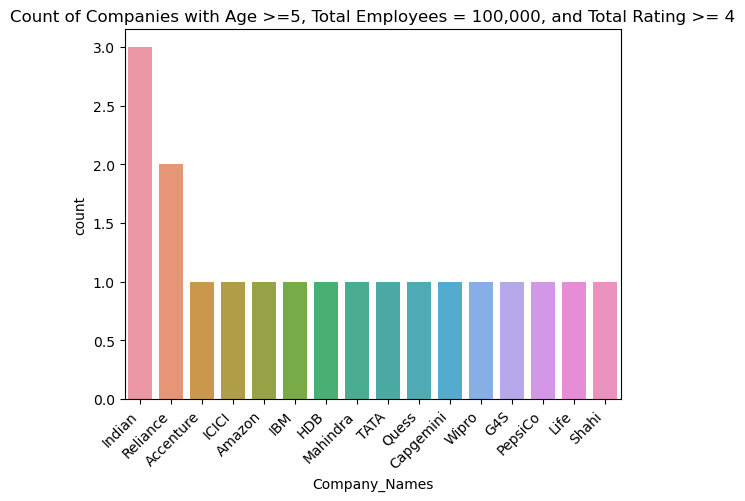

In [44]:
sns.countplot(x='Company_Names', data=filtered_df_data, order=filtered_df_data['Company_Names'].value_counts().index)
plt.title('Count of Companies with Age >=5, Total Employees = 100,000, and Total Rating >= 4')
plt.xticks(rotation=45, ha='right')
plt.show()

**insight**
1. Analyzing companies with age greater than 5 years, total employees reaching 100,000, and a stellar total rating of 4.
2. Indian,Accenture,ICICI,Amazon,HDB,Deloitte,Mahindra,TATA,Quess,Capgemini,wipro,G45,Pepsico,life,Reliance,shahi are the companies 

In [99]:
df[df['Total_Employees']== 100000].describe()

,Total_Employees,Age,Office_Locations,Total_Reviews,Total_Jobs,Total_Rating
count,32.0,32.000000,32.000000,32.000000,32.000000,32.000000
mean,100000.0,63.281250,307.062500,14.309358,226.593750,4.006250
std,0.0,50.855415,321.667825,16.433825,243.274153,0.229919
min,100000.0,16.000000,57.000000,1.500000,1.000000,3.700000
25%,100000.0,29.000000,184.750000,3.025000,87.000000,3.900000
50%,100000.0,45.500000,189.000000,5.200000,101.000000,4.000000
75%,100000.0,78.000000,269.750000,21.500000,295.250000,4.100000
max,100000.0,217.000000,1484.000000,69.900000,925.000000,4.700000


In [100]:
filtered_df_data

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
1,Accenture,100000,34,Dublin,161,"Company Culture, Skill Development / Learning,...",44.300000,101,4.0,AmbitionBox Award Winner'22
5,ICICI,100000,29,Mumbai,1243,"Job Security, Skill Development / Learning, Co...",4.249862,212,4.0,AmbitionBox Award Winner'22
13,Amazon,100000,29,Seattle,424,"Company Culture, Salary & Benefits, Work Life ...",19.900000,675,4.1,AmbitionBox Award Winner'22
16,IBM,100000,112,Armonk,141,"Work Life Balance, Job Security, Skill Develop...",4.249862,101,4.1,AmbitionBox Award Winner'22
19,HDB,100000,16,Ahmedabad,923,"Skill Development / Learning, Job Security, Co...",17.100000,57,4.0,AmbitionBox Award Winner'22
24,Reliance,100000,46,New,189,"Job Security, Skill Development / Learning, Wo...",12.700000,35,4.0,AmbitionBox Award Winner'22
32,Mahindra,100000,78,New,189,"Job Security, Skill Development / Learning, Co...",8.500000,95,4.1,AmbitionBox Award Winner'22
58,TATA,100000,116,Noida,163,"Job Security, Skill Development / Learning, Wo...",5.500000,18,4.1,Not Received
65,Indian,100000,128,New,189,"Job Security, Company Culture, Work Satisfaction",5.200000,101,4.7,Not Received
73,Quess,100000,16,Bangalore,482,Work Life Balance,4.800000,243,4.0,Not Received


In [45]:
# Scatter_Plot

filtered_df = df[(df['Total_Rating'] == 4) & (df['Total_Employees'] == 100000)].head(10)

In [46]:
filtered_df

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.400000,102,4.0,AmbitionBox Award Winner'22
5,ICICI,100000,29,Mumbai,1243,"Job Security, Skill Development / Learning, Co...",4.037326,212,4.0,AmbitionBox Award Winner'22
19,HDB,100000,16,Ahmedabad,923,"Skill Development / Learning, Job Security, Co...",17.200000,58,4.0,AmbitionBox Award Winner'22
24,Reliance,100000,46,Navi,199,"Job Security, Skill Development / Learning, Wo...",12.800000,40,4.0,AmbitionBox Award Winner'22
73,Quess,100000,16,Bangalore,484,Work Life Balance,4.800000,243,4.0,Not Received
92,Capgemini,100000,46,Mumbai,199,"Job Security, Work Life Balance, Company Culture",4.100000,2,4.0,Not Received
200,Wipro,100000,78,Bangalore,117,"Job Security, Skill Development / Learning, Co...",2.400000,102,4.0,Not Received
301,G4S,100000,27,Gurgaon,199,Work Life Balance,1.900000,2,4.0,Not Received


In [103]:
filtered_df1 = df.sort_values(by=['Total_Rating', 'Total_Employees','Age'], ascending=False).head(10)

In [104]:
selected_columns = ['Age', 'Total_Rating', 'Total_Employees','Company_Names']
new_df = filtered_df1[selected_columns].copy()
new_df

,Age,Total_Rating,Total_Employees,Company_Names
373,30,4.8,7500,Kalyan
163,27,4.8,2500,Kogta
238,7,4.8,75,Marpu
65,128,4.7,100000,Indian
194,91,4.6,100000,Indian
27,23,4.6,25000,iEnergizer
304,7,4.6,25000,IDFC
220,17,4.6,7500,Paras
33,27,4.5,25000,AU
266,15,4.5,25000,TVS


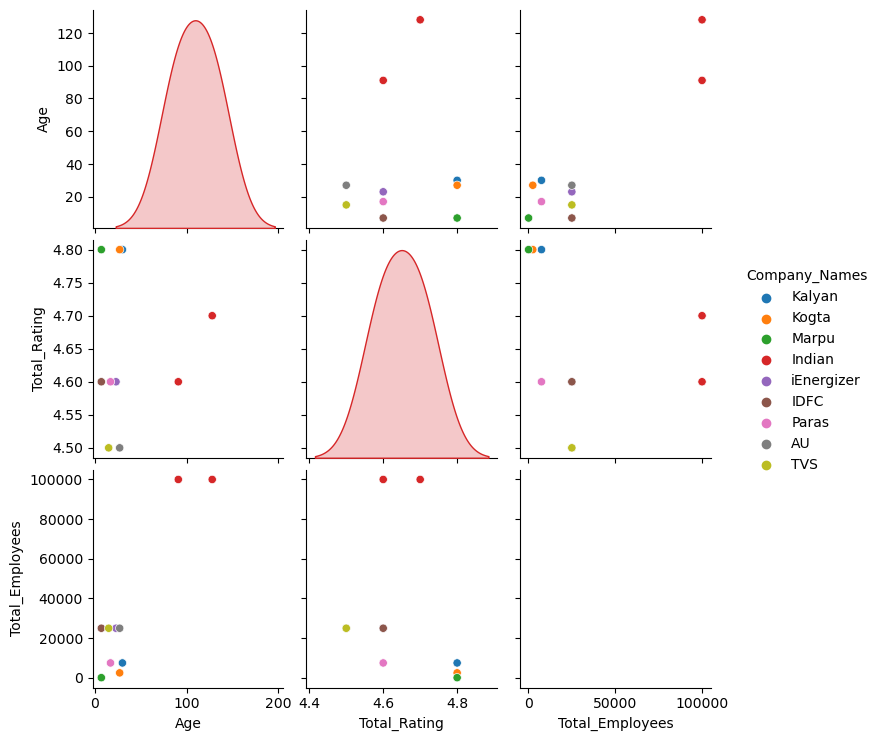

In [105]:
sns.pairplot(new_df, hue='Company_Names')
plt.show()

**Insights**
1. Above plot visualizes the relationship between the total number of employees and the total ratings for various companies, using different colors to distinguish each company.

2. A distinct marker highlights companies with a rating is morethan or equalto 4 and 100,000 employees, providing a clear reference point within the scatter plot for easy identification of specific data points.


In [67]:
Job_Security = []
for i in range(len(df['High_Rated_For'])):
    a = re.findall(r'Job\sSecurity', df['High_Rated_For'][i])
    if len(a)>0:
        Job_Security.append(a[0])
    else:
        Job_Security.append(np.nan)

In [68]:
df['Job_Security'] = [re.findall(r'Job\sSecurity', value)[0] if re.findall(r'Job\sSecurity', value) else np.nan for value in df['High_Rated_For']]

In [69]:
null_values_Security = df['Job_Security'].isnull().sum()
df['Job_Security'].fillna('No Job_Security',inplace = True)

In [70]:
filtered_df_a = df[(df['AmbitionBox_Awards'] == " AmbitionBox Award Winner'22") & (df['Job_Security'] == 'Job Security')].head(10)

In [71]:
df['AmbitionBox_Awards'].unique()

array(['Not Received', " AmbitionBox Award Winner'22"], dtype=object)

In [72]:
filtered_df_a

,Company_Names,Total_Employees,Age,Headquater,Office_Locations,High_Rated_For,Total_Reviews,Total_Jobs,Total_Rating,AmbitionBox_Awards,Job_Security
1,Accenture,100000,34,Dublin,162,"Company Culture, Skill Development / Learning,...",44.400000,102,4.0,AmbitionBox Award Winner'22,Job Security
3,Wipro,100000,78,Bangalore,199,Job Security,37.400000,313,3.8,AmbitionBox Award Winner'22,Job Security
4,HDFC,100000,29,Mumbai,1489,"Job Security, Skill Development / Learning",32.200000,412,3.9,AmbitionBox Award Winner'22,Job Security
5,ICICI,100000,29,Mumbai,1243,"Job Security, Skill Development / Learning, Co...",4.037326,212,4.0,AmbitionBox Award Winner'22,Job Security
6,Infosys,100000,42,Bengaluru,199,"Job Security, Company Culture, Skill Developme...",30.300000,869,3.9,AmbitionBox Award Winner'22,Job Security
7,Capgemini,100000,56,Paris,115,"Job Security, Work Life Balance, Skill Develop...",28.200000,905,3.8,AmbitionBox Award Winner'22,Job Security
10,Genpact,100000,26,New,199,"Job Security, Skill Development / Learning, Wo...",25.100000,102,3.9,AmbitionBox Award Winner'22,Job Security
16,IBM,100000,112,Armonk,142,"Work Life Balance, Job Security, Skill Develop...",4.037326,102,4.1,AmbitionBox Award Winner'22,Job Security
18,Reliance,100000,17,Navi,199,"Skill Development / Learning, Job Security",17.600000,246,3.9,AmbitionBox Award Winner'22,Job Security
19,HDB,100000,16,Ahmedabad,923,"Skill Development / Learning, Job Security, Co...",17.200000,58,4.0,AmbitionBox Award Winner'22,Job Security
